In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
##This is the updated dataset with all of the NLP features added here. This dataset was the result of our NLP applications
##in the other notebook.
df= pd.read_csv('data/merged_00s_10s-with-NLPFeatures.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,track,artist,uri,danceability,energy,key,loudness,mode,...,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,0,0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,1,1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,2,2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,3,4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,4,5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538


In [4]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [5]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538


## EDA Phase 1
#### Phase 2 (modelling after this) after this

In [6]:
#how many rows in dataset

number_of_rows = len(df.index)
print(number_of_rows)

10179


In [7]:
df['track'].unique()

array(['Lucky Man', 'On The Hotline', 'Clouds Of Dementia', ...,
       'Lotus Flowers', 'Calling My Spirit', 'Stormy Weather'],
      dtype=object)

In [8]:
#number of unique tracks
len(df['track'].unique())

#The output is 11240 ,expecting 12270 rows based on rows in csv
#need to investigate why less tracks,duplicate tracks present?

9250

In [9]:
df['artist'].unique()

array(['Montgomery Gentry', 'Pretty Ricky', 'Candlemass', ..., 'Regentum',
       'Liam Payne Featuring Quavo', 'The Neighbourhood'], dtype=object)

In [10]:
#number of unique tracks
len(df['artist'].unique())


4934

In [11]:
df.dropna()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10174,Untouchable,YoungBoy Never Broke Again,spotify:track:4MofYf0f4ijlVV6elUW5S3,0.780,0.784,1,-5.039,1,0.1860,0.044700,...,63.871763,3.754527,"['remember', 'wanted', 'quit', 'time', 'knew',...",remember wanted quit time knew momentd come ti...,0.007665,0.002057,0.154089,0.003046,0.000000,0.000000
10175,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.886000,...,49.904586,4.667325,"['61', 'akthesavior', 'lord', 'fubu', 'dimensi...",61 akthesavior lord fubu dimension bad sun hea...,0.008044,0.036615,0.007537,0.008495,0.001649,0.000000
10176,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.099600,...,59.287305,3.657388,"['heart', 'lyric', 'gave', 'hot', 'crib', 'kep...",heart lyric gave hot crib kept fire crib gon d...,0.011567,0.000000,0.146971,0.000000,0.000000,0.000000
10177,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.013200,...,72.690763,3.853535,"['think', 'im', 'pretty', 'makeup', 'think', '...",think im pretty makeup think im funny tell pun...,0.060205,0.012229,0.007075,0.000000,0.015103,0.013778


In [12]:
pd.set_option('display.max_columns', None)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,lyrics,lyricsClean,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,[Verse 1]\nI have days where I hate my job\nTh...,i have days where i hate my job this little to...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,[Hook: Pleasure]\nIt's five in the mornin'\nAn...,its five in the mornin and im up havin phone s...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,Jaded and demented\nIn the attic the bonemen s...,jaded and demented in the attic the bonemen so...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,[Verse 1]\nI don't want to rush this thing\nI ...,i dont want to rush this thing i dont want to ...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.26800,0.136,0.969,135.347,192720,4,28.29051,10,0,The July which immediately succeeded my marria...,the july which immediately succeeded my marria...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538


In [13]:
##take a look at null count in each column to make a decision to drop any column with many values
#there seems to be no nulls in any column values which is good - no need to prune any column
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
lyrics              0
lyricsClean         0
Repetitiveness      0
avgWordLength       0
tokens              0
lyricText           0
topic 1             0
topic 2             0
topic 3             0
topic 4             0
topic 5             0
topic 6             0
dtype: int64

In [14]:
df.head(20)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,lyrics,lyricsClean,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1,[Verse 1]\nI have days where I hate my job\nTh...,i have days where i hate my job this little to...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1,[Hook: Pleasure]\nIt's five in the mornin'\nAn...,its five in the mornin and im up havin phone s...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0,Jaded and demented\nIn the attic the bonemen s...,jaded and demented in the attic the bonemen so...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1,[Verse 1]\nI don't want to rush this thing\nI ...,i dont want to rush this thing i dont want to ...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.268000,0.1360,0.969,135.347,192720,4,28.29051,10,0,The July which immediately succeeded my marria...,the july which immediately succeeded my marria...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538
5,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.000000,0.3210,0.290,77.250,89427,4,45.77202,4,0,Currently fixing transcript\nOpening Theme\nPr...,currently fixing transcript opening theme pres...,66.168446,4.242809,"['currently', 'fixing', 'transcript', 'opening...",currently fixing transcript opening theme pres...,0.043499,0.090538,0.015708,0.000000,0.001761,0.012038
6,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.000000,0.1930,0.746,124.711,239240,4,35.59732,10,1,[Verse 1]\nWell I was rolling wheels and shift...,well i was rolling wheels and shifting gears a...,68.725011,3.901124,"['rolling', 'wheel', 'shifting', 'gear', 'jers...",rolling wheel shifting gear jersey turnpike ba...,0.006231,0.047592,0.007017,0.000000,0.003409,0.020859
7,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,153.105,253640,4,19.65701,11,1,[Verse 1]\nStopped to have a few at five now y...,stopped to have a few at five now youre crossi...,67.337278,3.924012,"['stopped', 'youre', 'crossing', 'center', 'li...",stopped youre crossing center line time second...,0.028562,0.049002,0.033202,0.000000,0.004188,0.000000
8,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,124.213,314286,3,32.66343,16,0,[Verse 1]\nI want to know your plans and how i...,i want to know 

In [15]:
#take a look at data types of each column before making any conversion of a feature/column data type
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
lyrics               object
lyricsClean          object
Repetitiveness      float64
avgWordLength       float64
tokens               object
lyricText            object
topic 1             float64
topic 2             float64
topic 3             float64
topic 4             float64
topic 5             float64
topic 6             float64
dtype: object

In [16]:
#convert the data type of 'track' and artist features from 'object' to string
df['track'] = df['track'].astype(str)
df['artist'] = df['artist'].astype(str)


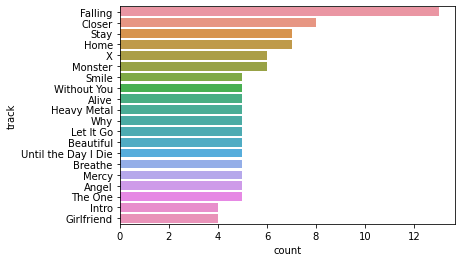

In [17]:
sns.countplot(y="track", data=df,
              order=df.track.value_counts().iloc[:20].index)

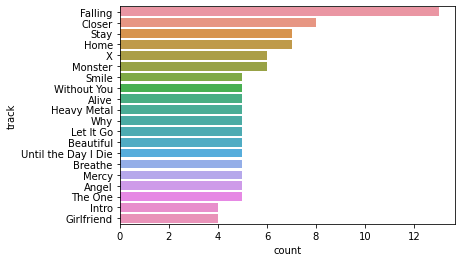

In [18]:
sns.countplot(y="track", data=df,
              order=df.track.value_counts().iloc[:20].index)
#the graph indicates ther are duplicate tracks

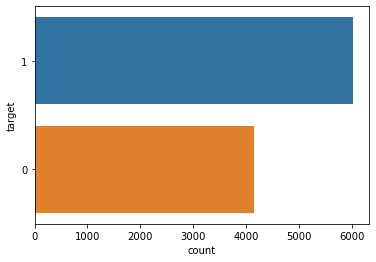

In [19]:
#the target column is nothing but popularity/hit feature with values of 0 or 1 indicateing flop or hit
sns.countplot(y="target", data=df,
              order=df.target.value_counts().iloc[:20].index)
#the output graph shows taht it is a 60-40 percentage of hits-flops. 60% hit and 40% flop.

C:\Users\deban\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


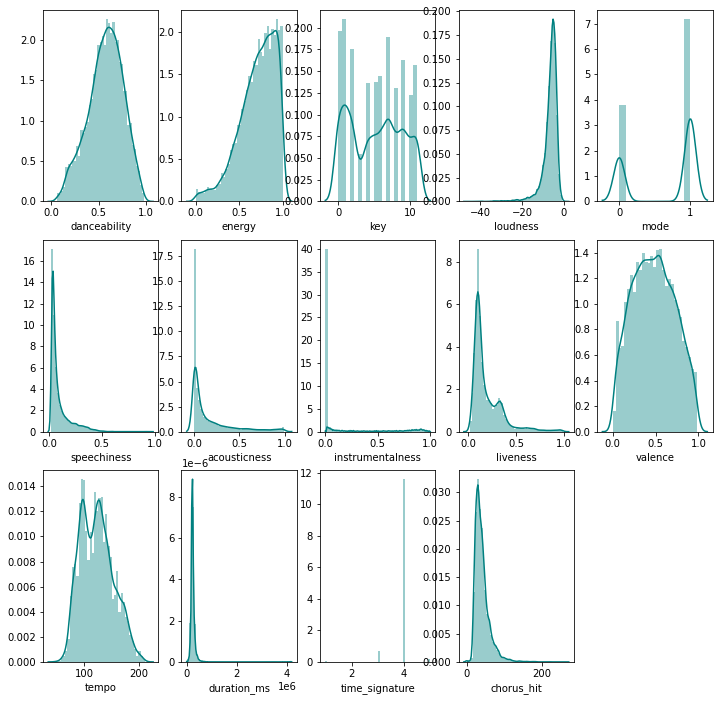

In [20]:
#Lets have a look at distribution based on acoustic features using histograms

f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( df["danceability"] , color="teal", ax=axes[0, 0])
sns.distplot( df["energy"] , color="teal", ax=axes[0, 1])
sns.distplot( df["key"] , color="teal", ax=axes[0, 2])
sns.distplot( df["loudness"] , color="teal", ax=axes[0, 3])
sns.distplot( df["mode"] , color="teal", ax=axes[0, 4])
sns.distplot( df["speechiness"] , color="teal", ax=axes[1, 0])
sns.distplot( df["acousticness"] , color="teal", ax=axes[1, 1])
sns.distplot( df["instrumentalness"] , color="teal", ax=axes[1, 2])
sns.distplot( df["liveness"] , color="teal", ax=axes[1, 3])
sns.distplot( df["valence"] , color="teal", ax=axes[1, 4])
sns.distplot( df["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( df["duration_ms"] , color="teal", ax=axes[2, 1])
sns.distplot( df["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( df["chorus_hit"] , color="teal", ax=axes[2, 3])

f.delaxes(axes[2][4])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BCD50EE50>,
      dtype=object)

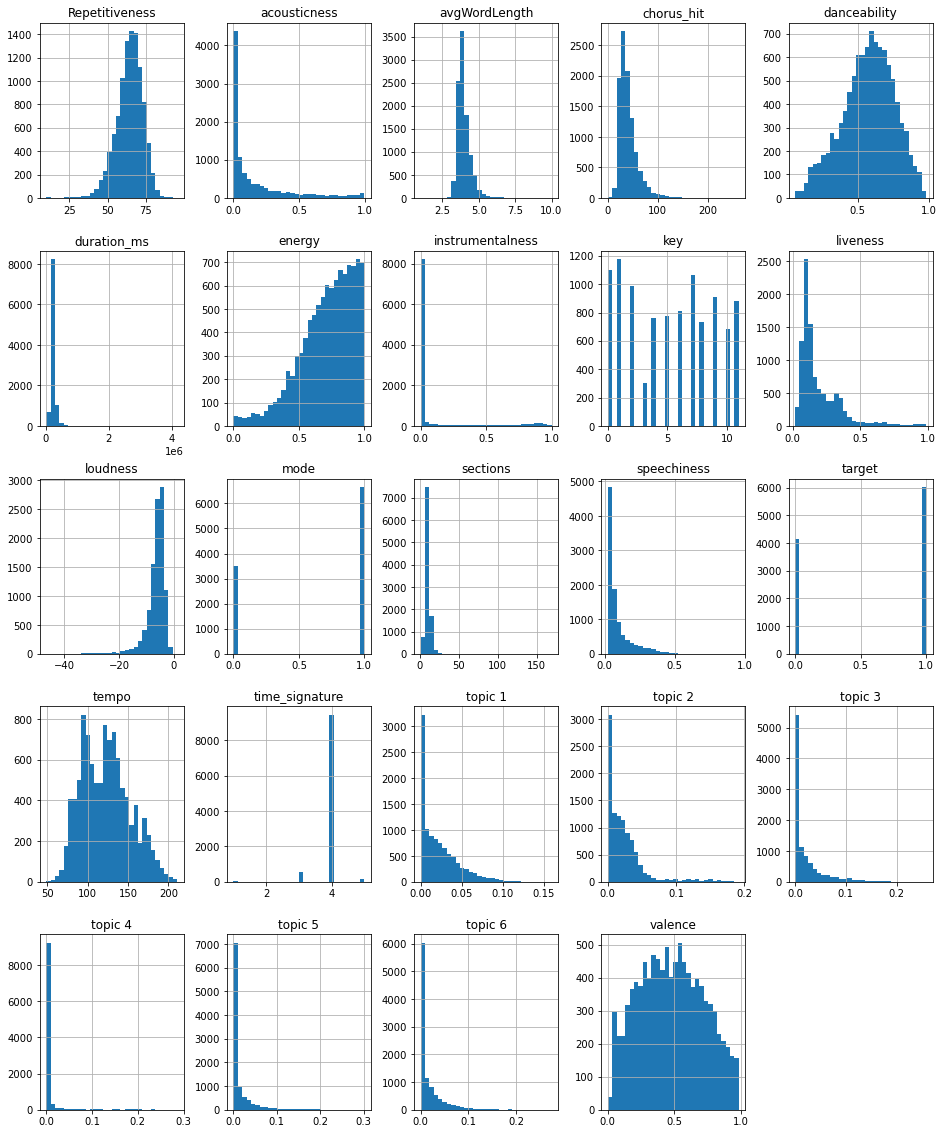

In [21]:
df.hist(figsize=(16,20), bins=30)

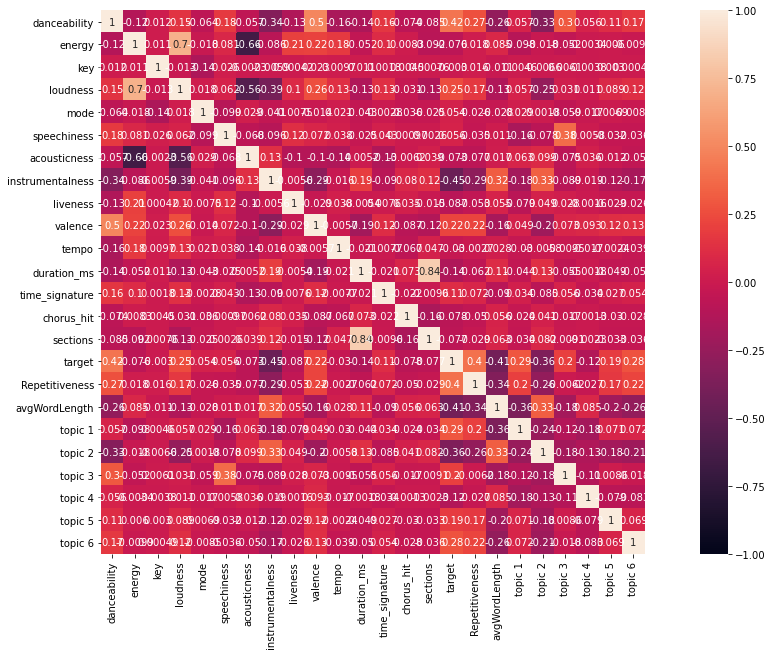

In [22]:
corrmat = df.corr()
fig = plt.figure(figsize = (20, 10))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

All tracks in the order of average danceability

In [23]:
duration_df = df[["track", "duration_ms"]].groupby('track').agg(
    Mean_duration=pd.NamedAgg("duration_ms", "mean") 
)
duration_df = duration_df.reset_index()
duration_df = duration_df.head(40)

In [24]:
duration_df["track"] = duration_df["track"].str.replace('\$\$','\\$\\$')

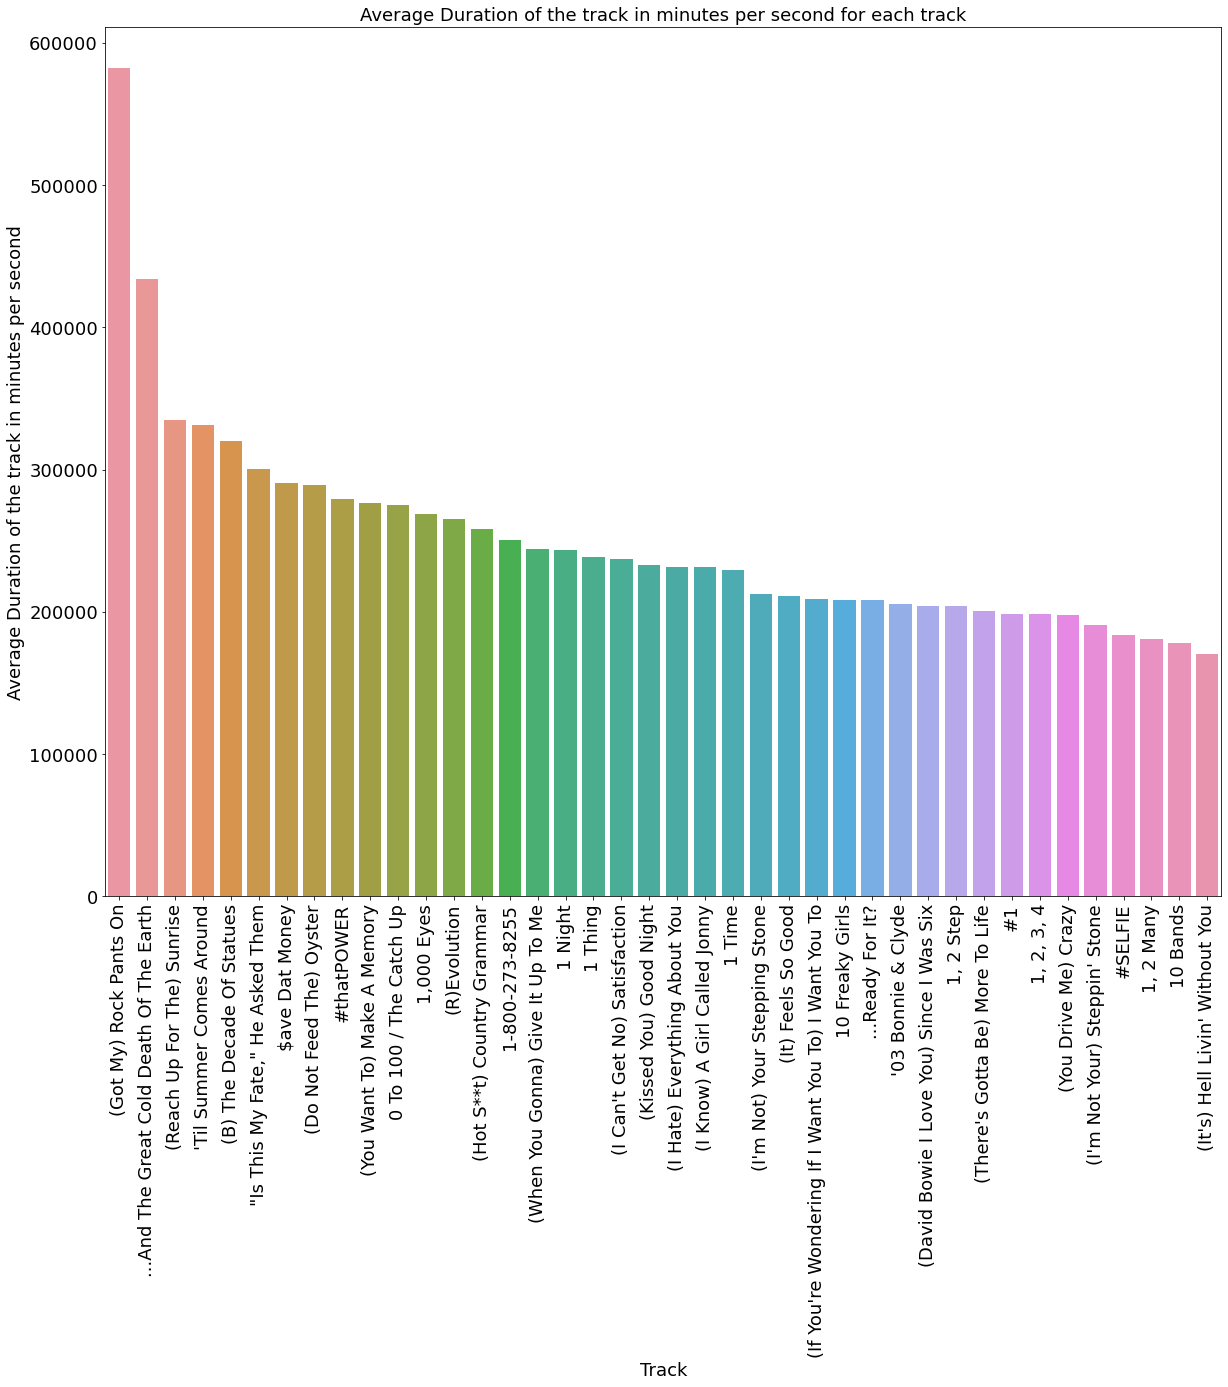

In [25]:
plt.figure(figsize=(20,16))
# make barplot and sort bars in descending order
sns.barplot(x='track', 
            y="Mean_duration", 
            data=duration_df, 
            order=duration_df.sort_values('Mean_duration', ascending = False).track)
# set labels
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Track", size=18)
plt.ylabel("Average Duration of the track in minutes per second", size=18)
plt.title("Average Duration of the track in minutes per second for each track", size=18)
plt.savefig('duration_ms.png')

In [26]:
df["track"] = df["track"].str.replace('\$\$','\\$\\$')

In [27]:
danceability_df = df.head(20)

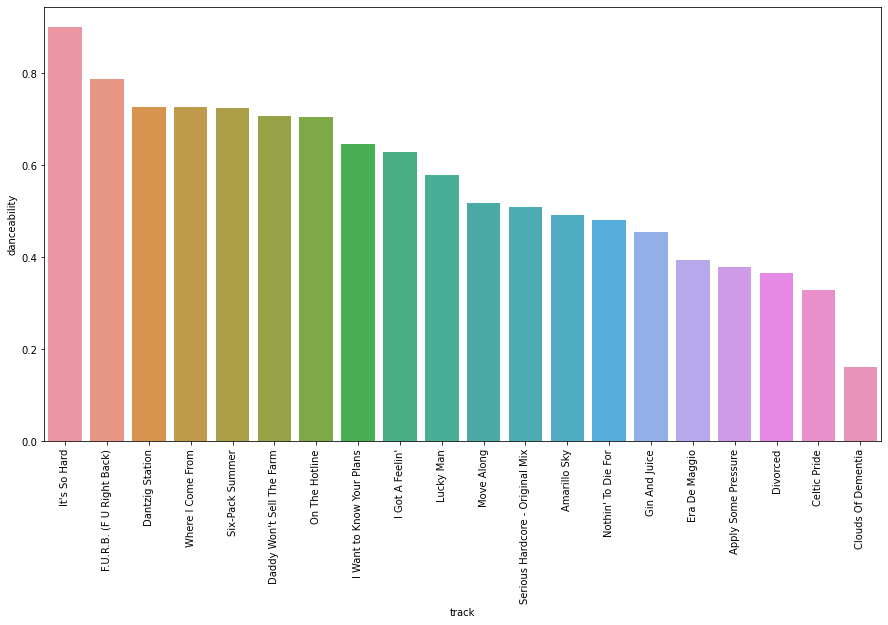

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='track', 
            y="danceability", 
            data=danceability_df,
           order=danceability_df.sort_values('danceability', ascending = False).track)
plt.savefig('danceability.png')

In [29]:
chorus_hit_df = df.head(20)

In [30]:
chorus_hit_df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,lyrics,lyricsClean,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1,[Verse 1]\nI have days where I hate my job\nTh...,i have days where i hate my job this little to...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1,[Hook: Pleasure]\nIt's five in the mornin'\nAn...,its five in the mornin and im up havin phone s...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0,Jaded and demented\nIn the attic the bonemen s...,jaded and demented in the attic the bonemen so...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1,[Verse 1]\nI don't want to rush this thing\nI ...,i dont want to rush this thing i dont want to ...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.268000,0.1360,0.969,135.347,192720,4,28.29051,10,0,The July which immediately succeeded my marria...,the july which immediately succeeded my marria...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538
5,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.000000,0.3210,0.290,77.250,89427,4,45.77202,4,0,Currently fixing transcript\nOpening Theme\nPr...,currently fixing transcript opening theme pres...,66.168446,4.242809,"['currently', 'fixing', 'transcript', 'opening...",currently fixing transcript opening theme pres...,0.043499,0.090538,0.015708,0.000000,0.001761,0.012038
6,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.000000,0.1930,0.746,124.711,239240,4,35.59732,10,1,[Verse 1]\nWell I was rolling wheels and shift...,well i was rolling wheels and shifting gears a...,68.725011,3.901124,"['rolling', 'wheel', 'shifting', 'gear', 'jers...",rolling wheel shifting gear jersey turnpike ba...,0.006231,0.047592,0.007017,0.000000,0.003409,0.020859
7,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,153.105,253640,4,19.65701,11,1,[Verse 1]\nStopped to have a few at five now y...,stopped to have a few at five now youre crossi...,67.337278,3.924012,"['stopped', 'youre', 'crossing', 'center', 'li...",stopped youre crossing center line time second...,0.028562,0.049002,0.033202,0.000000,0.004188,0.000000
8,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,124.213,314286,3,32.66343,16,0,[Verse 1]\nI want to know your plans and how i...,i want to know 

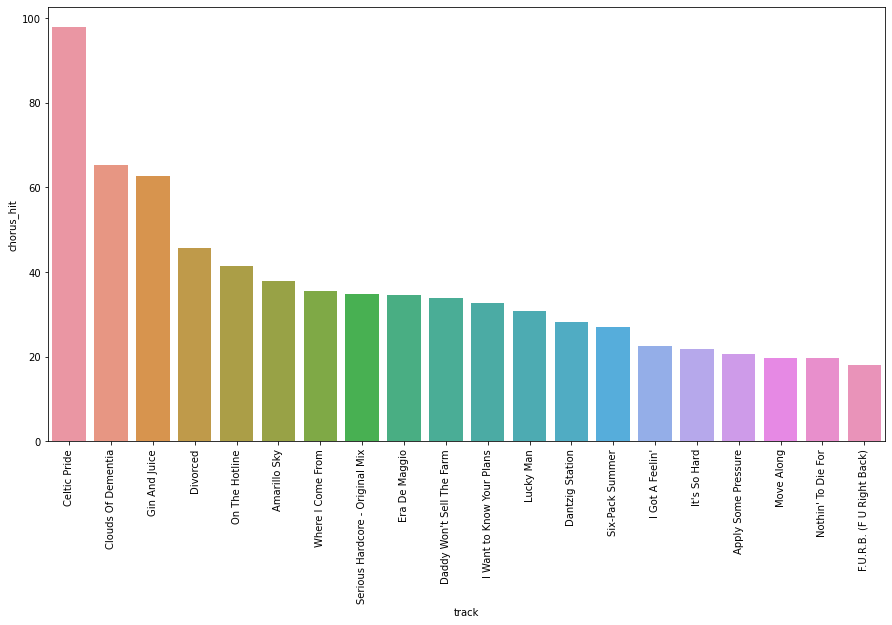

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='track', 
            y="chorus_hit", 
            data=chorus_hit_df,
           order=chorus_hit_df.sort_values('chorus_hit', ascending = False).track)
plt.savefig('chorus_hit.png')

In [32]:
Duration_df = df.head(100)

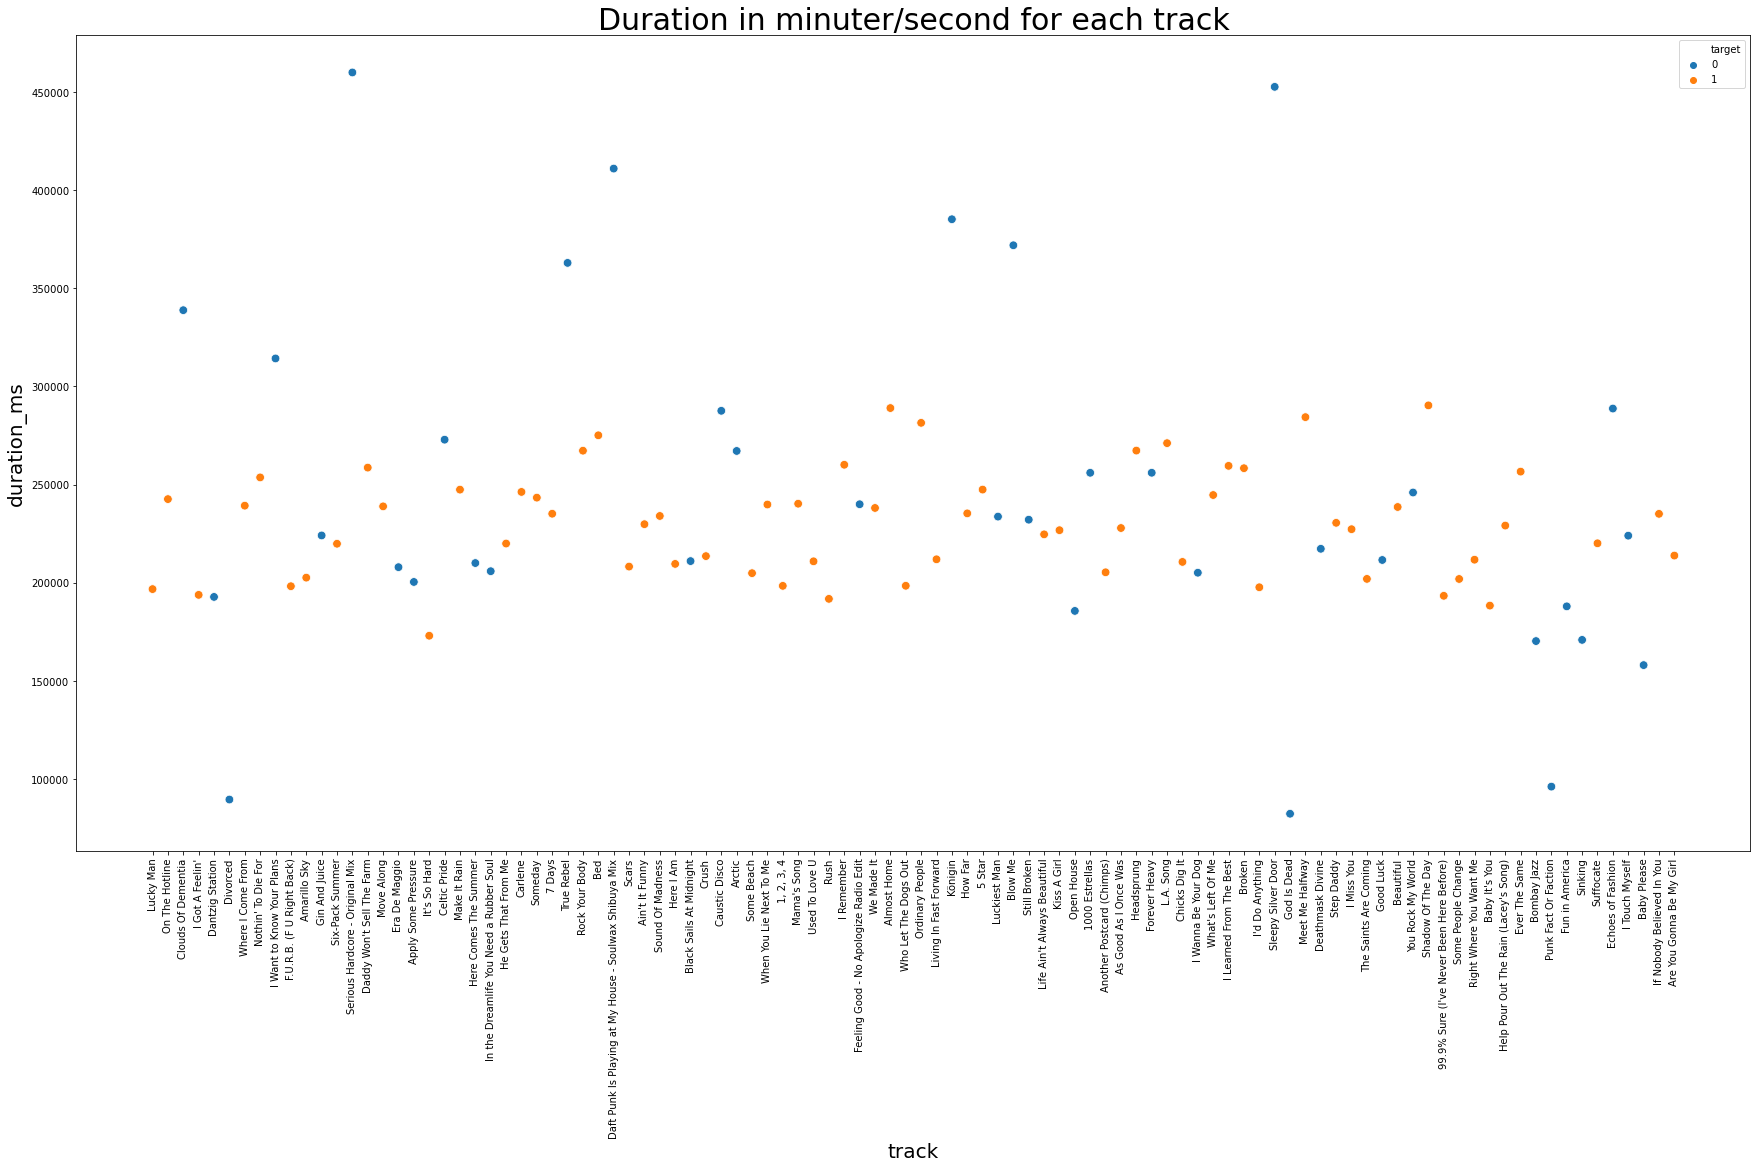

In [33]:
fig, ax = plt.subplots(figsize=(30, 15))


sns.scatterplot(data=Duration_df, x="track", y="duration_ms", s=75, hue="target",
sizes=40)
plt.xticks(rotation=90)
ax.set_title("Duration in minuter/second for each track", fontsize=30)
ax.set_xlabel("track", fontsize=20)
ax.set_ylabel("duration_ms", fontsize=20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.savefig('duration_ms_scatter.png')

## Modelling Phase 2 with all NLP fetaures

Take note of which percent of the songs in the dataset made it to the hits and flops.

Fro log reg check on the coefficients. But ensure scaling. 

In [34]:
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
lyrics              0
lyricsClean         0
Repetitiveness      0
avgWordLength       0
tokens              0
lyricText           0
topic 1             0
topic 2             0
topic 3             0
topic 4             0
topic 5             0
topic 6             0
dtype: int64

In [35]:
##We remove non numberic variables like the lyrics, the tracks so that we can get the accoustic features and the 
##variables retreived from the nlp like topic modelling variables, average word length, etc
X = df.drop(['track', 'target', 'artist', 'uri', 'lyrics', 'lyricsClean', 'tokens', 'lyricText'], axis=1)
Y = df.target

In [36]:
##Split it into train test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 99)

In [37]:
##Scaling the datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0)
lg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [39]:
y_pred_log = lg.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix_logistic = confusion_matrix(Y_test, y_pred_log)

In [41]:
conf_matrix_logistic

array([[ 772,  284],
       [ 127, 1362]], dtype=int64)

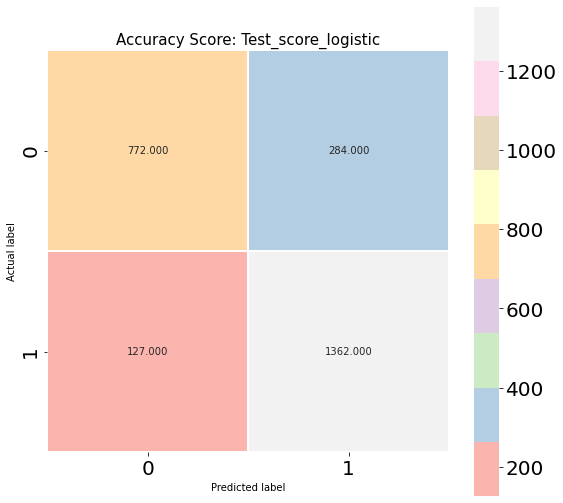

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix_logistic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('Test_score_logistic')
plt.title(all_sample_title, size = 15);
plt.draw()

In [43]:
##Logistic Regression accuracy score
from sklearn.metrics import accuracy_score
accuracy_score_logistic = accuracy_score(Y_test, y_pred_log)
accuracy_score_logistic

0.8385068762278979

In [44]:
##Logistic Regression precision score
from sklearn.metrics import precision_score
precision_score_logistic = precision_score(Y_test, y_pred_log)
precision_score_logistic

0.827460510328068

In [45]:
##Logistic Regression recall score
from sklearn.metrics import recall_score
recall_score_logistic = recall_score(Y_test, y_pred_log)
recall_score_logistic

0.9147078576225655

In [46]:
from sklearn.metrics import f1_score
f1_score_logistic = f1_score(Y_test, y_pred_log)
f1_score_logistic

0.8688995215311004

In [47]:
weight = lg.coef_

In [48]:
weight

array([[ 0.68130766, -1.06760378,  0.01926918,  1.31758282,  0.19084708,
         0.0161817 , -0.23559206, -1.33283495, -0.02699903, -0.06128468,
         0.06511935, -0.02001236,  0.14349464, -0.04841939,  0.01866248,
         0.57314705, -0.36494992,  0.39797589, -0.25969766,  0.28333731,
        -0.26977778,  0.10303324,  0.3944248 ]])

In [49]:
logReg_coeff = pd.DataFrame({'feature_name': X.columns, 'model_coefficient': weight.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)

[Text(0, 0, '1.3175828167353067'),
 Text(0, 0, '0.681307661028466'),
 Text(0, 0, '0.5731470455022573'),
 Text(0, 0, '0.397975886249694'),
 Text(0, 0, '0.3944247965027282'),
 Text(0, 0, '0.28333731113108296'),
 Text(0, 0, '0.19084707630194483')]

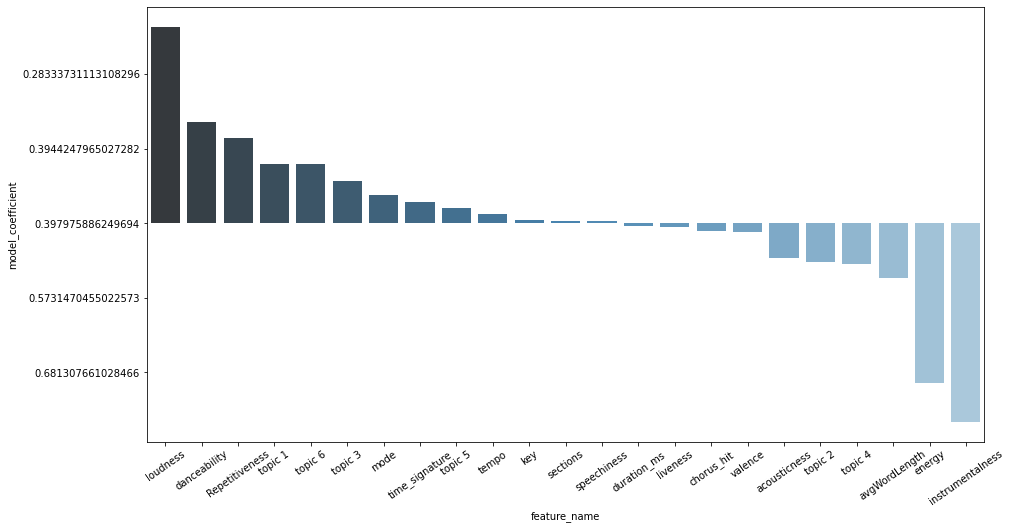

In [50]:
##Vizualization of the Logistic Regression Coefficient
plt.figure().set_size_inches(15, 8)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff, palette="Blues_d")
fg3.set_xticklabels(rotation=35, fontsize=10, labels=logReg_coeff.feature_name)
fg3.set_yticklabels(fontsize=10, labels=logReg_coeff.model_coefficient)

The top nodes on the decision tree would help get an idea of which features

In [51]:
##Decision Tree Classifier with 10 set for Max leaf nodes
dlf = DecisionTreeClassifier(max_leaf_nodes=10, random_state = 1)
dlf.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

In [52]:
y_pred_dlf = dlf.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
conf_dlf_matrix_logistic = confusion_matrix(Y_test, y_pred_dlf)

In [54]:
conf_dlf_matrix_logistic

array([[ 684,  372],
       [ 108, 1381]], dtype=int64)

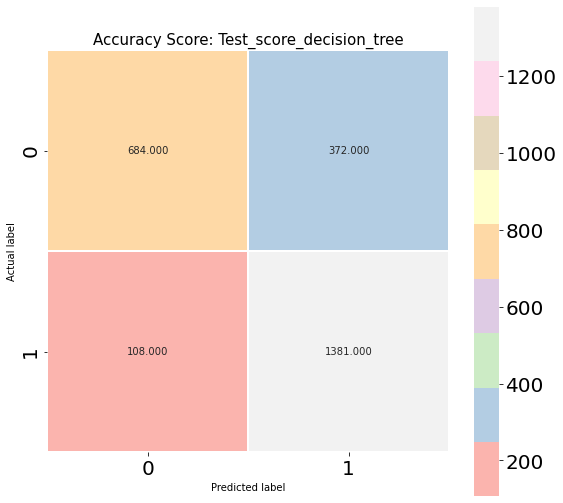

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_dlf_matrix_logistic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('Test_score_decision_tree')
plt.title(all_sample_title, size = 15);
plt.draw()

In [56]:
##Accuracy Score Decision Tree
accuracy_score_dlf = accuracy_score(Y_test, y_pred_dlf)
accuracy_score_dlf

0.8113948919449901

In [57]:
##Precision Score Decision Tree
precision_score_dlf = precision_score(Y_test, y_pred_dlf)
precision_score_dlf

0.7877923559612093

In [58]:
##Recall Score Decision Tree
recall_score_dlf = recall_score(Y_test, y_pred_dlf)
recall_score_dlf

0.9274680993955675

In [59]:
##F1 Score Decision Tree
f1_score_dlf = f1_score(Y_test, y_pred_dlf)
f1_score_dlf

0.851943244910549

In [60]:
from sklearn import tree

In [61]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,lyrics,lyricsClean,Repetitiveness,avgWordLength,tokens,lyricText,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,[Verse 1]\nI have days where I hate my job\nTh...,i have days where i hate my job this little to...,62.947368,3.546980,"['day', 'hate', 'job', 'little', 'town', 'worl...",day hate job little town world sunday bengal l...,0.011999,0.052774,0.052982,0.000000,0.000800,0.003794
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,[Hook: Pleasure]\nIt's five in the mornin'\nAn...,its five in the mornin and im up havin phone s...,55.187638,3.632979,"['mornin', 'im', 'havin', 'phone', 'sex', 'wit...",mornin im havin phone sex witchu horny horny i...,0.040800,0.004089,0.050103,0.003798,0.016797,0.009736
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,Jaded and demented\nIn the attic the bonemen s...,jaded and demented in the attic the bonemen so...,54.740406,3.945455,"['jaded', 'demented', 'attic', 'bonemen', 'soa...",jaded demented attic bonemen soared slammed do...,0.001125,0.034021,0.000000,0.000000,0.000000,0.000000
3,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,[Verse 1]\nI don't want to rush this thing\nI ...,i dont want to rush this thing i dont want to ...,62.159864,3.608333,"['dont', 'want', 'rush', 'thing', 'dont', 'wan...",dont want rush thing dont want jump gun want l...,0.039737,0.000000,0.023000,0.000000,0.026695,0.028066
4,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.26800,0.136,0.969,135.347,192720,4,28.29051,10,0,The July which immediately succeeded my marria...,the july which immediately succeeded my marria...,63.132388,4.150701,"['july', 'immediately', 'succeeded', 'marriage...",july immediately succeeded marriage memorable ...,0.000541,0.165159,0.000000,0.000000,0.000000,0.010538


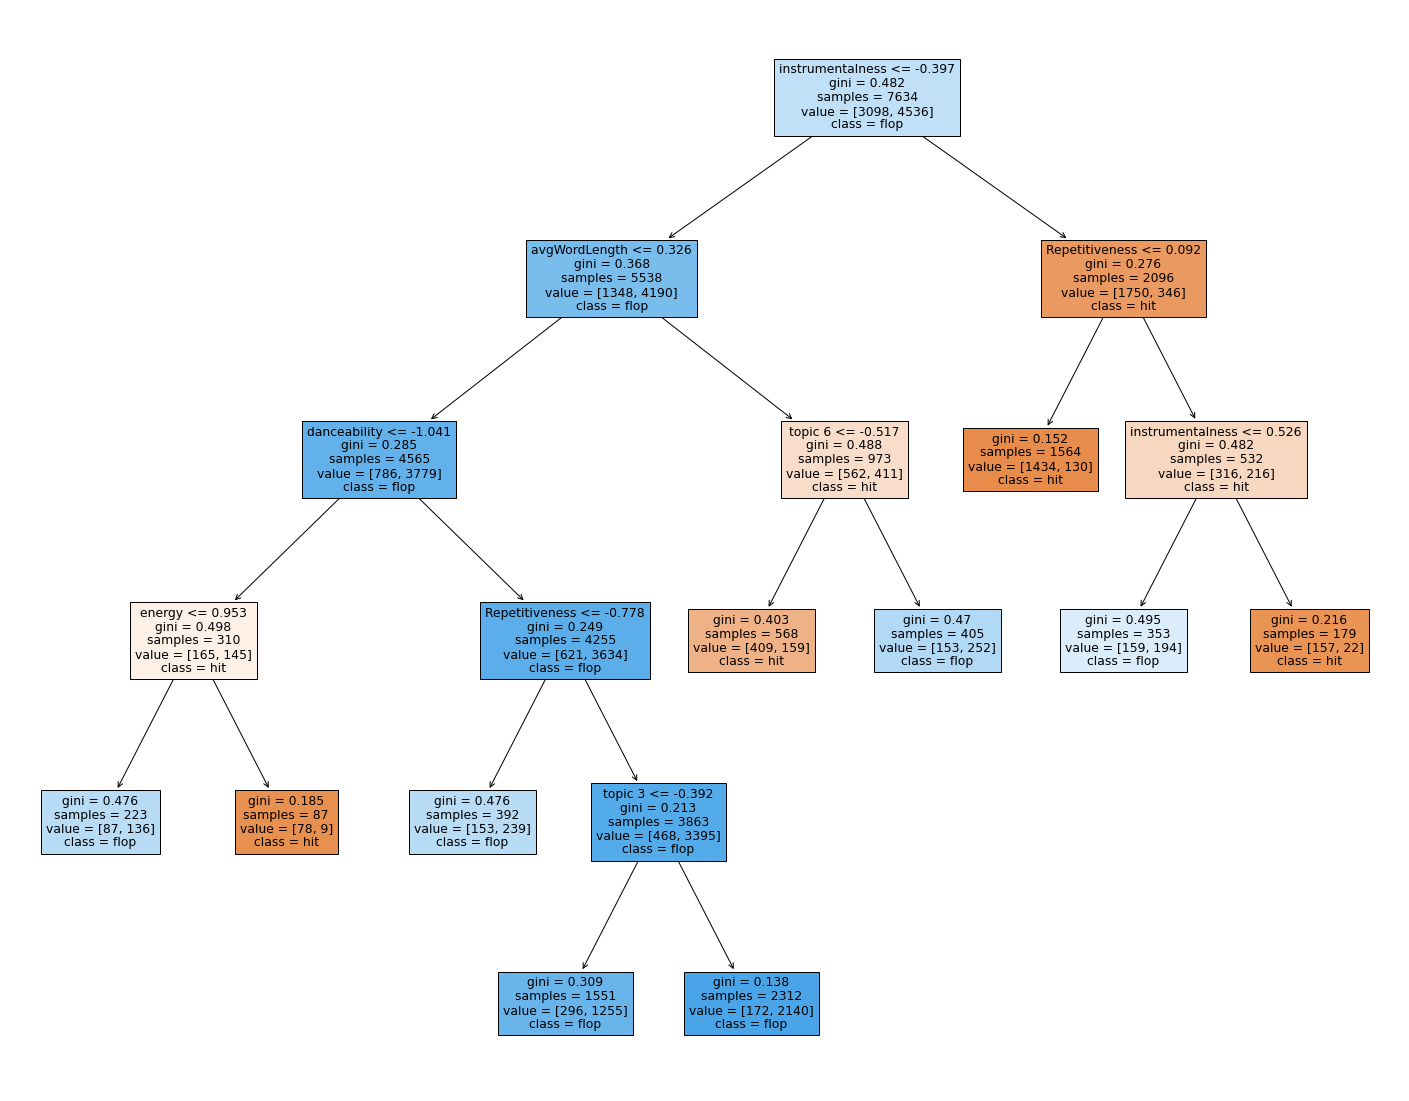

In [62]:
## Decision Tree Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dlf, 
                   feature_names=X.columns,  
                   class_names=['hit', 'flop'],
                   filled=True)
fig.savefig('Decision_Tree.png')

In [63]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [64]:
y_predict_rf = random_forest.predict(X_test)

In [65]:
CM_rf = confusion_matrix(Y_test, y_predict_rf)

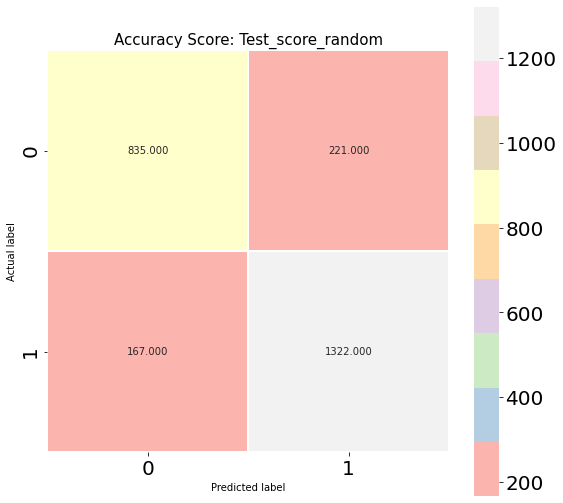

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(CM_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('Test_score_random')
plt.title(all_sample_title, size = 15);
plt.draw()

In [67]:
##Accuracy Score Random Forest
accuracy_score_rf = accuracy_score(Y_test, y_predict_rf)
accuracy_score_rf

0.8475442043222003

In [68]:
##Precision Score Random Forest
precision_score_rf = precision_score(Y_test, y_predict_rf)
precision_score_rf

0.8567725210628645

In [69]:
##Recall Score Random Forest
recall_score_rf = recall_score(Y_test, y_predict_rf)
recall_score_rf

0.8878441907320349

In [70]:
##F1 Score Random Forest
f1_score_rf = f1_score(Y_test, y_predict_rf)
f1_score_rf

0.8720316622691293

In [71]:
random_forest.feature_importances_

array([0.07915439, 0.05856834, 0.01426048, 0.04193386, 0.00450684,
       0.0329776 , 0.05337064, 0.13710717, 0.02579586, 0.03709183,
       0.02242816, 0.05311019, 0.00232132, 0.02215737, 0.014947  ,
       0.08658487, 0.0602417 , 0.04735263, 0.05171035, 0.04623809,
       0.01712736, 0.02620696, 0.06480696])

<BarContainer object of 23 artists>

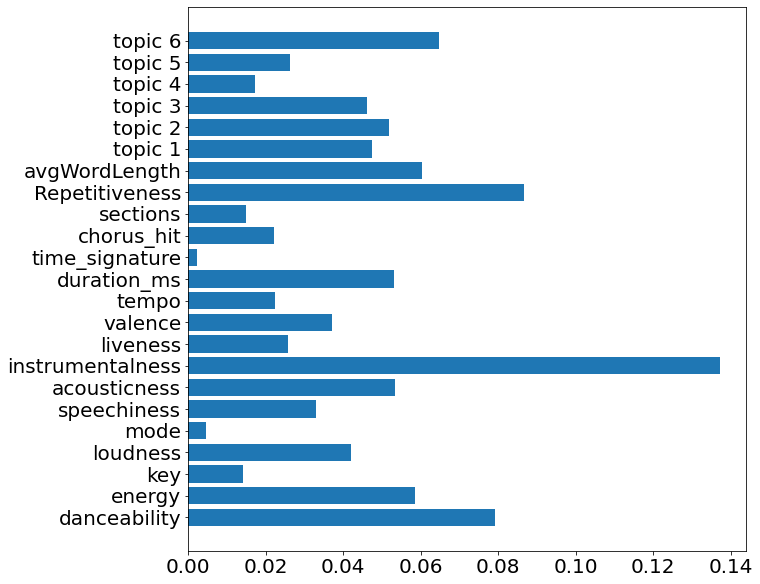

In [72]:
##Feature importance for Random Forest in each of the features
plt.figure(figsize=(10,10))
plt.barh(X.columns, random_forest.feature_importances_)

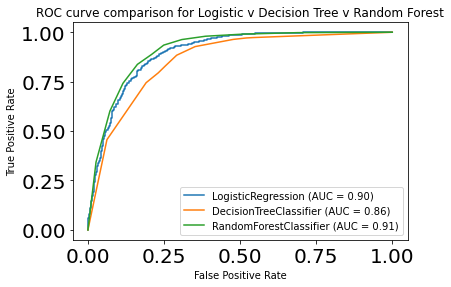

In [73]:
##ROC curve shows Random Forest has highest score and logistiv  regression is not much far behind.
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
lg_plot = plot_roc_curve(lg, X_test, Y_test) 
dt_plot = plot_roc_curve(dlf, X_test, Y_test, ax = lg_plot.ax_)
rf_plot = plot_roc_curve(random_forest, X_test, Y_test, ax = dt_plot.ax_)
plt.title('ROC curve comparison for Logistic v Decision Tree v Random Forest')
plt.show()